El archivo rrhh.csv contiene información de la situación laboral de los
trabajadores de la empresa ABAC. Las variables disponibles son:

    ● Estado: Estado actual del trabajador en la empresa (1: desvinculado, 0: vinculado).
    ● Edad: Edad del trabajador en años.
    ● Ratio.Pago: Medida de pago por hora (numerico)
    ● Salario: Salario mensual en dólares que tiene o tenía el trabajador
    ● Dias.trabajados: Días que lleva o llevaba trabajando en la empresa
    ● Ausencias: Días que ha faltado a trabajar
    ● Sexo: Sexo del trabajador (Female , Male)
    ● Estado.Civil: Estado civil del trabajador (1: divorciado, 2: casado,3:separado, 4: soltero, 5: viuda)
    ● Departamento: Lugar de trabajo en la empresa (Admin Offices,..)
    ● Posicion: Cargo del trabajador/empleado (Accountant I ,.... )
    ● Desempeño: Clasificación del desempeño del trabajador.

1. Cargue los datos y revise los formatos de cada variable, recuerde codificar las variables como numéricas o factores según corresponda.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

In [145]:
#Importar
import pandas as pd
#Dividir en punto y coma ademas de considerar el punto como decimal. Y mostar. 
df = pd.read_csv("CD-M5AE4_rrhh.csv", sep=';', decimal='.')
display(df)

,Estado,Edad,Ratio.Pago,Salario,Dias.trabajados,Ausencias,Sexo,Estado.Civil,Departamento,Posicion,DesempeÃ±o
0,0,30,28.50,4.167.066.666.666.660,3317,1,Female,2,Admin Offices,Accountant I,Fully Meets
1,0,34,23.00,6.962.466.666.666.660,1420,17,Male,1,Admin Offices,Accountant I,Fully Meets
2,0,31,29.00,4.330.333.333.333.330,1154,3,Male,4,Admin Offices,Accountant I,Fully Meets
3,0,32,21.50,4.332.733.333.333.330,58,15,Female,2,Admin Offices,Administrative Assistant,N/A- too early to review
4,0,30,16.56,33.883.333.333.333.300,940,2,Female,4,Admin Offices,Administrative Assistant,N/A- too early to review
...,...,...,...,...,...,...,...,...,...,...,...
305,0,48,52.25,4.029.733.333.333.330,289,14,Male,4,IT/IS,Senior BI Developer,Fully Meets
306,0,36,51.00,4.392.866.666.666.660,284,13,Male,4,IT/IS,Senior BI Developer,Fully Meets
307,0,34,46.00,3234.2,284,4,Male,4,IT/IS,BI Developer,Fully Meets
308,0,30,45.00,14.696.666.666.666.600,220,16,Male,2,IT/IS,BI Developer,Fully Meets


In [146]:
df.describe()

,Estado,Ratio.Pago,Dias.trabajados,Ausencias,Estado.Civil
count,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.409677,31.284806,1296.080645,10.264516,2.903226
std,0.492569,15.383615,769.491382,5.843235,1.150625
min,0.000000,14.000000,2.000000,1.000000,1.000000
25%,0.000000,20.000000,766.250000,5.000000,2.000000
50%,0.000000,24.000000,1238.000000,10.000000,3.000000
75%,1.000000,45.315000,1732.750000,15.000000,4.000000
max,1.000000,80.000000,4339.000000,20.000000,5.000000


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Estado           310 non-null    int64  
 1   Edad             310 non-null    object 
 2   Ratio.Pago       310 non-null    float64
 3   Salario          310 non-null    object 
 4   Dias.trabajados  310 non-null    int64  
 5   Ausencias        310 non-null    int64  
 6   Sexo             310 non-null    object 
 7   Estado.Civil     310 non-null    int64  
 8   Departamento     310 non-null    object 
 9   Posicion         310 non-null    object 
 10  DesempeÃ±o       310 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 26.8+ KB


In [148]:
y = df['Edad'].values
y

array(['30', '34', '31', '32', '30', '30', '33', '33', '31', '39', '63',
       '38', '32', '46', '31', '34', '31', '29', '33', '33', '36', '31',
       '30', '48', '39', '37', '45', '54', '31', '4.699.999.999.999.990',
       '32', '49', '29', '45', '30', '28', '29', '37', '30', '39', '37',
       '30', '49', '43', '31', '53', '45', '66', '32', '35',
       '5.199.999.999.999.990', '40', '35', '49', '48', '34', '44', '36',
       '45', '41', '36', '36', '41', '4.199.999.999.999.990',
       '4.199.999.999.999.990', '40', '62', '34', '29', '28', '41', '35',
       '48', '44', '44', '34', '40', '4.699.999.999.999.990', '39',
       '4.699.999.999.999.990', '59', '28', '27', '48', '35', '67', '39',
       '34', '34', '30', '37', '40', '38', '41', '31', '39', '40', '51',
       '35', '39', '31', '25.999.999.999.999.900', '44', '39', '34', '29',
       '63', '28', '31', '37', '32', '38', '34', '27', '48', '43', '38',
       '25', '48', '39', '43', '35', '41', '35', '65', '44', '34', '27',


In [176]:
a = df['Edad'][df['Edad'].str.contains('9.990')]
print (a)
print (a.index)

29     4.699.999.999.999.990
50     5.199.999.999.999.990
63     4.199.999.999.999.990
64     4.199.999.999.999.990
77     4.699.999.999.999.990
79     4.699.999.999.999.990
129    5.199.999.999.999.990
133    4.199.999.999.999.990
135    4.699.999.999.999.990
142    4.199.999.999.999.990
168    4.699.999.999.999.990
199    5.199.999.999.999.990
204    5.199.999.999.999.990
254    4.199.999.999.999.990
256    4.199.999.999.999.990
260    4.199.999.999.999.990
275    4.699.999.999.999.990
277    4.199.999.999.999.990
287    5.199.999.999.999.990
Name: Edad, dtype: object
Int64Index([ 29,  50,  63,  64,  77,  79, 129, 133, 135, 142, 168, 199, 204,
            254, 256, 260, 275, 277, 287],
           dtype='int64')


In [178]:
df1 = df.drop(a.index ,axis=0)
df1

,Estado,Edad,Ratio.Pago,Salario,Dias.trabajados,Ausencias,Sexo,Estado.Civil,Departamento,Posicion,DesempeÃ±o
0,0,30,28.50,4.167.066.666.666.660,3317,1,Female,2,Admin Offices,Accountant I,Fully Meets
1,0,34,23.00,6.962.466.666.666.660,1420,17,Male,1,Admin Offices,Accountant I,Fully Meets
2,0,31,29.00,4.330.333.333.333.330,1154,3,Male,4,Admin Offices,Accountant I,Fully Meets
3,0,32,21.50,4.332.733.333.333.330,58,15,Female,2,Admin Offices,Administrative Assistant,N/A- too early to review
4,0,30,16.56,33.883.333.333.333.300,940,2,Female,4,Admin Offices,Administrative Assistant,N/A- too early to review
...,...,...,...,...,...,...,...,...,...,...,...
305,0,48,52.25,4.029.733.333.333.330,289,14,Male,4,IT/IS,Senior BI Developer,Fully Meets
306,0,36,51.00,4.392.866.666.666.660,284,13,Male,4,IT/IS,Senior BI Developer,Fully Meets
307,0,34,46.00,3234.2,284,4,Male,4,IT/IS,BI Developer,Fully Meets
308,0,30,45.00,14.696.666.666.666.600,220,16,Male,2,IT/IS,BI Developer,Fully Meets


In [167]:
y = df['Salario'].values
y

array(['4.167.066.666.666.660', '6.962.466.666.666.660',
       '4.330.333.333.333.330', '4.332.733.333.333.330',
       '33.883.333.333.333.300', '3.837.866.666.666.660',
       '6.377.333.333.333.330', '39.576.666.666.666.600',
       '3.189.133.333.333.330', '3345.2', '36.446.666.666.666.600',
       '3147.4', '6155.2', '39.139.333.333.333.300',
       '35.003.333.333.333.300', '3855.6', '4675.4',
       '39.350.666.666.666.600', '7.333.333.333.333.330', '3550',
       '34.029.333.333.333.300', '4.327.933.333.333.330', '4194',
       '4429.4', '38.543.333.333.333.300', '6.907.533.333.333.330',
       '7.091.133.333.333.330', '4.954.133.333.333.330',
       '3.566.133.333.333.330', '4200', '4.352.533.333.333.330',
       '4.291.666.666.666.660', '4.955.066.666.666.660',
       '4.250.866.666.666.660', '4.144.133.333.333.330',
       '5.179.466.666.666.660', '4.842.666.666.666.660', '6226.4',
       '35.230.666.666.666.600', '6.668.733.333.333.330',
       '4.790.666.666.666.660', '41

In [180]:
b = df1['Salario'][df1['Salario'].str.contains('.300')]
b1 = df1['Salario'][df1['Salario'].str.contains('.330')]
b2 = df1['Salario'][df1['Salario'].str.contains('.660')]
b3 = df1['Salario'][df1['Salario'].str.contains('.600')]
print (b, b1, b2, b3 )
print (b.index, b1.index, b2.index, b3.index)

4      33.883.333.333.333.300
13     39.139.333.333.333.300
14     35.003.333.333.333.300
20     34.029.333.333.333.300
24     38.543.333.333.333.300
44     40.253.333.333.333.300
53     39.429.333.333.333.300
69     35.459.333.333.333.300
106    38.543.333.333.333.300
110    35.345.333.333.333.300
138    34.605.333.333.333.300
146    40.769.333.333.333.300
151    36.003.333.333.333.300
176    30.263.333.333.333.300
179    40.899.333.333.333.300
186    37.125.333.333.333.300
196    38.383.333.333.333.300
208    31.609.333.333.333.300
209    35.373.333.333.333.300
214    35.709.333.333.333.300
216    30.665.333.333.333.300
224    31.199.333.333.333.300
226    30.953.333.333.333.300
240    10.019.333.333.333.300
242    35.453.333.333.333.300
246    31.833.333.333.333.300
252    33.833.333.333.333.300
255    34.613.333.333.333.300
269    40.903.333.333.333.300
278    38.913.333.333.333.300
279    32.275.333.333.333.300
281    37.559.333.333.333.300
289    39.015.333.333.333.300
Name: Sala

In [182]:
df2 = df1.drop(b.index,axis=0)
df3 = df2.drop(b1.index,axis=0)
df4 = df3.drop(b2.index,axis=0)
df5 = df4.drop(b3.index,axis=0)
df5

,Estado,Edad,Ratio.Pago,Salario,Dias.trabajados,Ausencias,Sexo,Estado.Civil,Departamento,Posicion,DesempeÃ±o
9,0,39,34.95,3345.2,3247,16,Female,2,Admin Offices,Sr. Accountant,Fully Meets
11,0,38,65.00,3147.4,2787,15,Female,4,IT/IS,CIO,Exceptional
12,1,32,43.00,6155.2,432,9,Female,4,IT/IS,Database Administrator,Fully Meets
15,0,34,34.00,3855.6,972,20,Female,4,IT/IS,Database Administrator,N/A- too early to review
16,1,31,40.00,4675.4,1056,16,Female,2,IT/IS,Database Administrator,90-day meets
...,...,...,...,...,...,...,...,...,...,...,...
300,0,51,27.00,3891.4,2295,11,Male,4,Software Engineering,Software Engineering Manager,Fully Meets
301,0,46,63.50,3676,446,7,Male,2,IT/IS,BI Director,Fully Meets
302,0,30,50.25,3870.8,420,9,Female,4,IT/IS,Senior BI Developer,Fully Meets
307,0,34,46.00,3234.2,284,4,Male,4,IT/IS,BI Developer,Fully Meets


2. Realice un análisis descriptivo de sus datos. Determinar si existen observaciones faltantes, en el caso de existir tome la decisión de omitirlas del estudio u omitir la variable. Evalúe si existen posibles incongruencias en la fuente de datos (ej: edades negativas). Y finalmente análice la presencia de valores atípicos en las variables.Comente.

Al hacer la revision de los valores se destaca que se cuenta con un total de 310 muestras, en el cual se busca definir la situacion laboral de la empresa. Considerando el estado, rango de pago, dias trabajados, ausencias y estado civil. Al hacer la primera revision, se destaca que la desviacion estandar del rango de pago es alta para todos los valores. Ahora respecto a el tipo de valores, tenemos numericos y categorias, para los cuales no tenemos ningun valor nulo. Y al revisar a detalle cada categoria, exiten dos incongruencias entre las edades, con valores que superan los 100 años y valores de de rango de pago que supera las 15 cifras. Estos datos finalmente fueron omitidos de la muestra, resultando 97 valores.

3. Realice análisis de cómo se relacionan las variables continuas con la variable de interés. Acompañe con gráficos y estadísticas. ¿Qué variables pudieran resultar significativas a la hora de modelar la probabilidad de que el trabajador sea desvinculado a la empresa?

In [184]:
df5.describe()

,Estado,Ratio.Pago,Dias.trabajados,Ausencias,Estado.Civil
count,97.000000,97.000000,97.000000,97.000000,97.000000
mean,0.474227,29.611753,1186.072165,10.103093,2.938144
std,0.501929,14.250919,851.273192,5.655905,1.143955
min,0.000000,14.000000,2.000000,1.000000,1.000000
25%,0.000000,19.750000,444.000000,6.000000,2.000000
50%,0.000000,24.000000,1112.000000,9.000000,3.000000
75%,1.000000,39.000000,1705.000000,15.000000,4.000000
max,1.000000,65.000000,3611.000000,20.000000,5.000000


In [185]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 9 to 309
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Estado           97 non-null     int64  
 1   Edad             97 non-null     object 
 2   Ratio.Pago       97 non-null     float64
 3   Salario          97 non-null     object 
 4   Dias.trabajados  97 non-null     int64  
 5   Ausencias        97 non-null     int64  
 6   Sexo             97 non-null     object 
 7   Estado.Civil     97 non-null     int64  
 8   Departamento     97 non-null     object 
 9   Posicion         97 non-null     object 
 10  DesempeÃ±o       97 non-null     object 
dtypes: float64(1), int64(4), object(6)
memory usage: 9.1+ KB


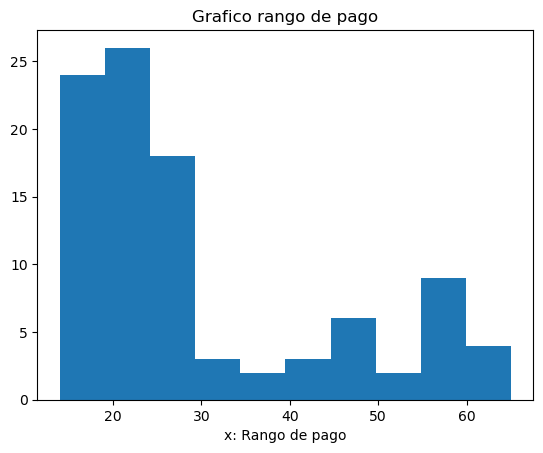

In [232]:
#Importar librerias
fig,ax = plt.subplots()
#cantidad media de habitaciones
x = df5["Ratio.Pago"]
ax.hist(x, color = "tab:blue")
#Titulos
plt.title('Grafico rango de pago')
plt.xlabel('x: Rango de pago')
plt.show()

Estado
0    27.0
1    22.0
Name: Ratio.Pago, dtype: float64


Text(0, 0.5, 'y: Rango de pago')

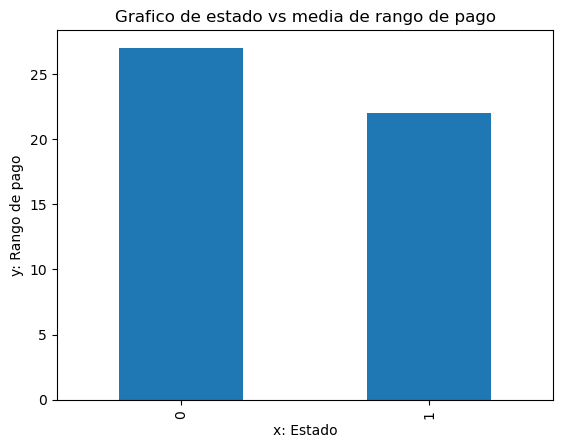

In [231]:
#Filtro solicitado solo con los sobrevivientes
df6 = df5.groupby(["Estado"])['Ratio.Pago'].median()
print(df6)
df6.plot(kind="bar");
plt.title('Grafico de estado vs media de rango de pago')
plt.xlabel('x: Estado')
plt.ylabel('y: Rango de pago')

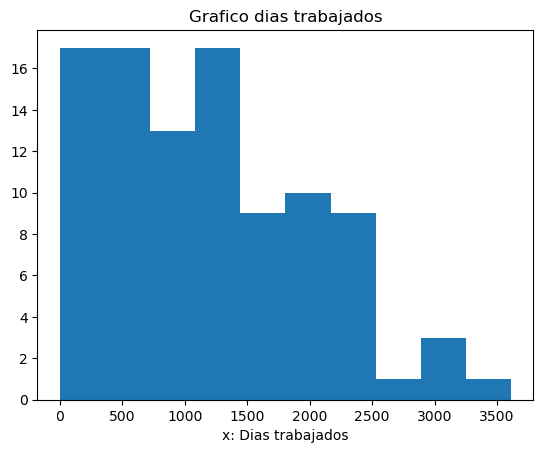

In [233]:
#Importar librerias
fig,ax = plt.subplots()
#cantidad media de habitaciones
x = df5["Dias.trabajados"]
ax.hist(x, color = "tab:blue")
#Titulos
plt.title('Grafico dias trabajados')
plt.xlabel('x: Dias trabajados')
plt.show()

Estado
0    1560.0
1     447.5
Name: Dias.trabajados, dtype: float64


Text(0, 0.5, 'y: Dias trabajados')

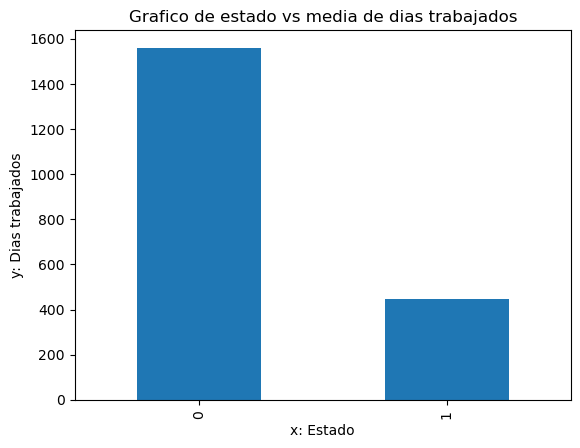

In [234]:
#Filtro solicitado solo con los sobrevivientes
df6 = df5.groupby(["Estado"])['Dias.trabajados'].median()
print(df6)
df6.plot(kind="bar");
plt.title('Grafico de estado vs media de dias trabajados')
plt.xlabel('x: Estado')
plt.ylabel('y: Dias trabajados')

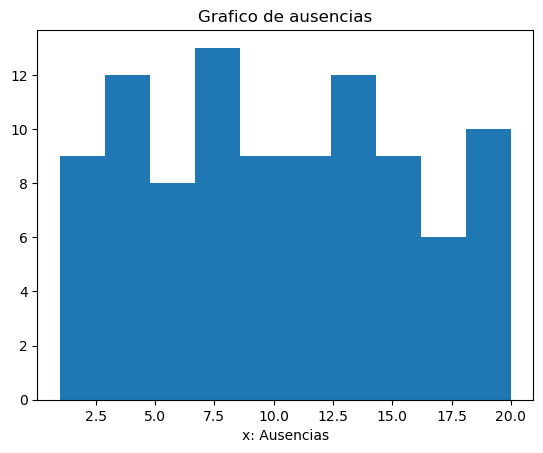

In [235]:
#Importar librerias
fig,ax = plt.subplots()
#cantidad media de habitaciones
x = df5["Ausencias"]
ax.hist(x, color = "tab:blue")
#Titulos
plt.title('Grafico de ausencias')
plt.xlabel('x: Ausencias')
plt.show()

Estado
0    9.0
1    9.5
Name: Ausencias, dtype: float64


Text(0, 0.5, 'y: Ausencias')

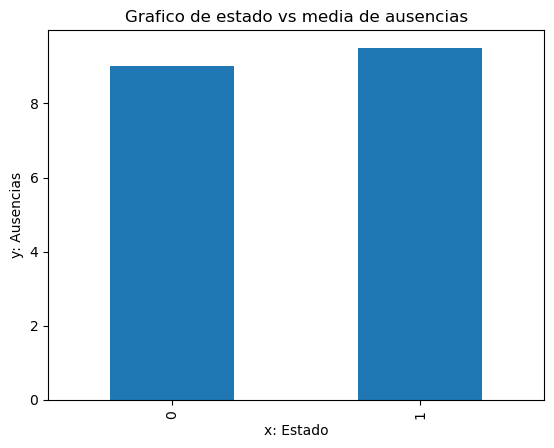

In [236]:
#Filtro solicitado solo con los sobrevivientes
df6 = df5.groupby(["Estado"])['Ausencias'].median()
print(df6)
df6.plot(kind="bar");
plt.title('Grafico de estado vs media de ausencias')
plt.xlabel('x: Estado')
plt.ylabel('y: Ausencias')

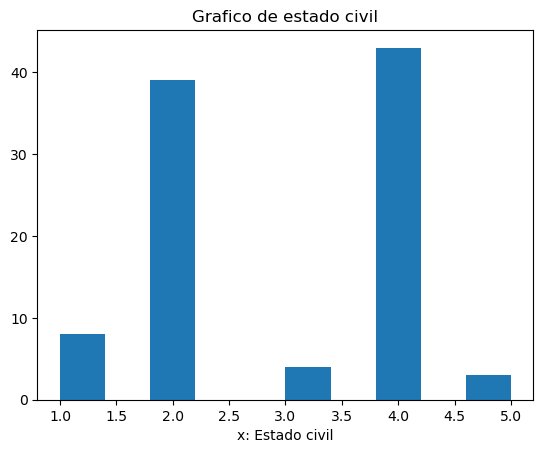

In [237]:
#Importar librerias
fig,ax = plt.subplots()
#cantidad media de habitaciones
x = df5["Estado.Civil"]
ax.hist(x, color = "tab:blue")
#Titulos
plt.title('Grafico de estado civil')
plt.xlabel('x: Estado civil')
plt.show()

Estado  Estado.Civil
0       2               23
        3                2
        4               25
        5                1
1       1                8
        2               16
        3                2
        4               18
        5                2
Name: Estado.Civil, dtype: int64
Estado
0    157
1    128
Name: Estado.Civil, dtype: int64


Text(0, 0.5, 'y: Estado civil')

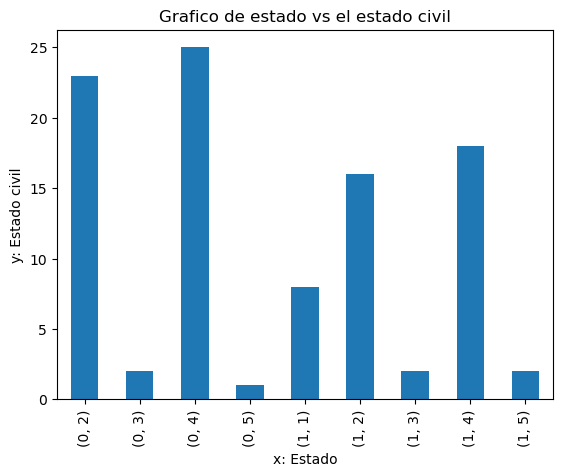

In [241]:
#Filtro solicitado solo con los sobrevivientes
df6 = df5.groupby(["Estado", 'Estado.Civil'])['Estado.Civil'].count()
df7 = df5.groupby(["Estado"])['Estado.Civil'].sum()
print(df6)
print(df7)
df6.plot(kind="bar");
plt.title('Grafico de estado vs el estado civil')
plt.xlabel('x: Estado')
plt.ylabel('y: Estado civil')

Estado: Estado actual del trabajador en la empresa (1: desvinculado, 0: vinculado).
Estado.Civil: Estado civil del trabajador (1: divorciado, 2: casado,3:separado, 4: soltero, 5: viuda)

Respecto a las variables continuas relacionadas con el estado que pueden modelar la probabildiad de estar desvinculado de la empresa se tiene que, respecto al rango de pago no hay una diferencia significativa entre el rango de pago y los dias de ausencia para los trabajadores que siguen en la empresa y lo que estan devinculados. Destacando que quienes estan desvinculados tienen un menos promedio de ingreso y mayor dias de ausencia. Ahora respecto a la promedio de dias trabajados, quienes estan trabajando tienen tienen de manera considerable una mayor promedio de dias respecto a los desvinculados, con una diferencia de casi 1.000 dias. Por ultimo respecto al estado civil, existe una mayor dotacion de trabajadores vinculados solteros, siguendo por los casados, luego vienen los desvinculados solteros y desvinculados casdos. 

3. Realice análisis de cómo se relacionan las variables categóricas con la variable de interés. Acompañe con gráficos y estadísticas. ¿Qué variables pudieran resultar significativas a la hora de modelar la probabilidad de que el trabajador sea desvinculado a la empresa?

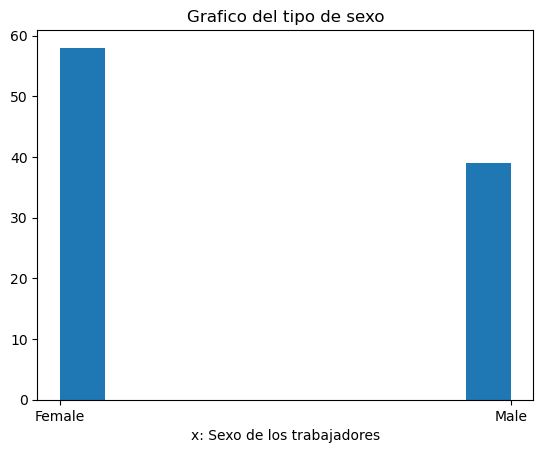

In [247]:
#Importar librerias
fig,ax = plt.subplots()
#cantidad media de habitaciones
x = df5["Sexo"]
ax.hist(x, color = "tab:blue")
#Titulos
plt.title('Grafico del tipo de sexo')
plt.xlabel('x: Sexo de los trabajadores')
plt.show()

Estado  Sexo  
0       Female    31
        Male      20
1       Female    27
        Male      19
Name: Sexo, dtype: int64


Text(0, 0.5, 'y: Canidad de tipo de sexo de los trabajadores')

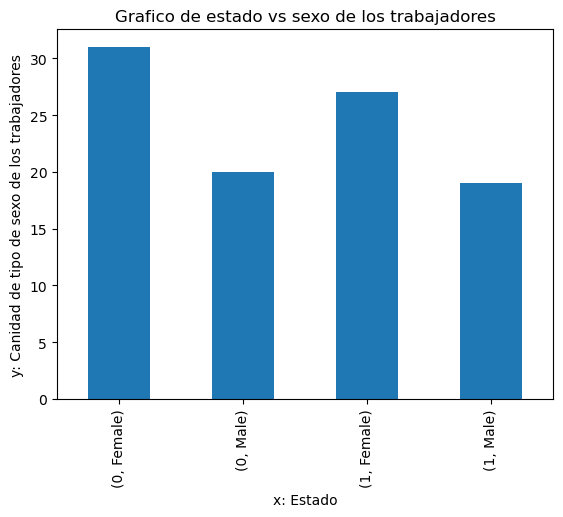

In [249]:
#Filtro solicitado solo con los sobrevivientes
df6 = df5.groupby(["Estado", 'Sexo' ])['Sexo'].count()
print(df6)
df6.plot(kind="bar");
plt.title('Grafico de estado vs sexo de los trabajadores')
plt.xlabel('x: Estado')
plt.ylabel('y: Canidad de tipo de sexo de los trabajadores')

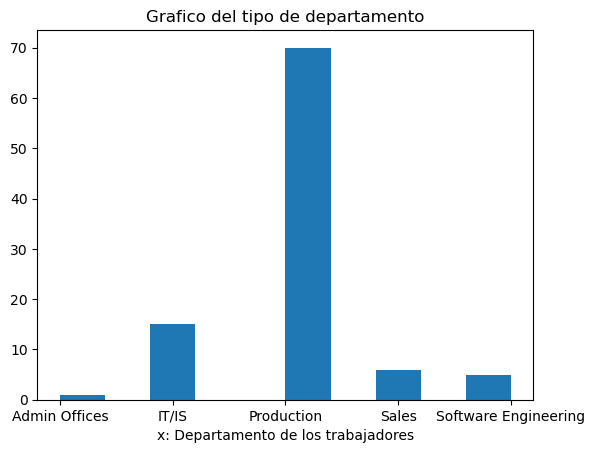

In [252]:
#Importar librerias
fig,ax = plt.subplots()
#cantidad media de habitaciones
x = df5["Departamento"]
ax.hist(x, color = "tab:blue")
#Titulos
plt.title('Grafico del tipo de departamento')
plt.xlabel('x: Departamento de los trabajadores')
plt.show()

Estado  Departamento        
0       Admin Offices            1
        IT/IS                   10
        Production              31
        Sales                    5
        Software Engineering     4
1       IT/IS                    5
        Production              39
        Sales                    1
        Software Engineering     1
Name: Departamento, dtype: int64


Text(0, 0.5, 'y: Canidad de departamento de los trabajadores')

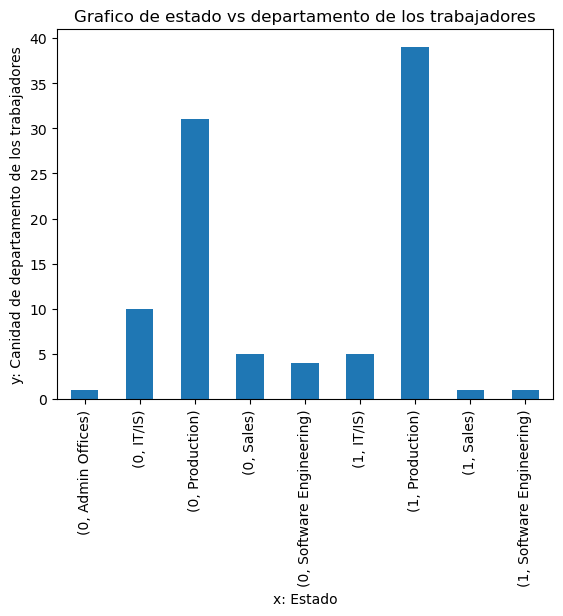

In [253]:
#Filtro solicitado solo con los sobrevivientes
df6 = df5.groupby(["Estado", 'Departamento' ])['Departamento'].count()
print(df6)
df6.plot(kind="bar");
plt.title('Grafico de estado vs departamento de los trabajadores')
plt.xlabel('x: Estado')
plt.ylabel('y: Canidad de departamento de los trabajadores')

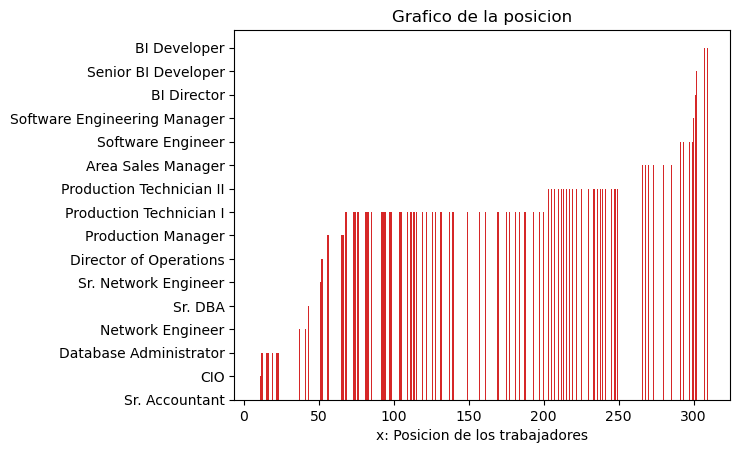

In [266]:
#cantidad media de habitaciones
x = df5["Posicion"]
fig, ax = plt.subplots()
ax.bar( x.index, x , color = "tab:red")
#Titulos
plt.title('Grafico de la posicion')
plt.xlabel('x: Posicion de los trabajadores')
plt.show()

Estado  Posicion                    
0       Area Sales Manager               5
        BI Developer                     2
        BI Director                      1
        CIO                              1
        Database Administrator           3
        Director of Operations           1
        Network Engineer                 1
        Production Manager               2
        Production Technician I         20
        Production Technician II         8
        Senior BI Developer              1
        Software Engineer                3
        Software Engineering Manager     1
        Sr. Accountant                   1
        Sr. Network Engineer             1
1       Area Sales Manager               1
        Database Administrator           3
        Network Engineer                 1
        Production Manager               1
        Production Technician I         24
        Production Technician II        14
        Software Engineer                1
        Sr. DBA  

Text(0, 0.5, 'y: Canidad de departamento de los trabajadores')

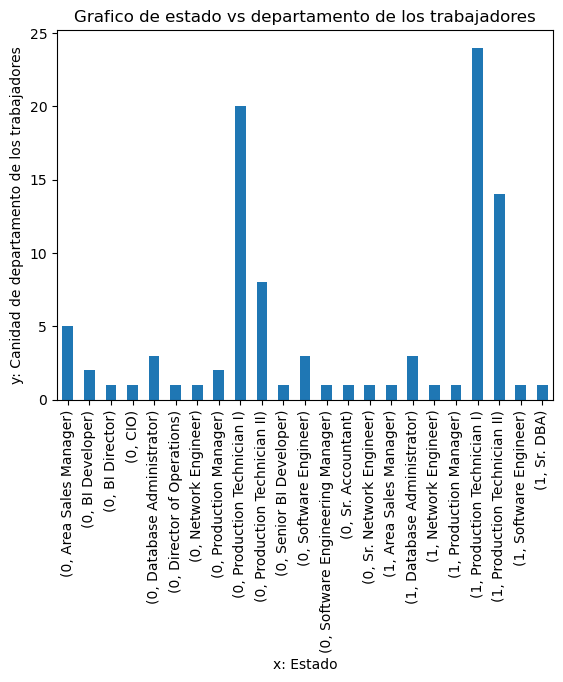

In [268]:
#Filtro solicitado solo con los sobrevivientes
df6 = df5.groupby(["Estado", 'Posicion' ])['Posicion'].count()
print(df6)
df7 = df5.groupby(["Estado"])['Posicion'].count()
print(df7)
df6.plot(kind="bar");
plt.title('Grafico de estado vs departamento de los trabajadores')
plt.xlabel('x: Estado')
plt.ylabel('y: Canidad de departamento de los trabajadores')

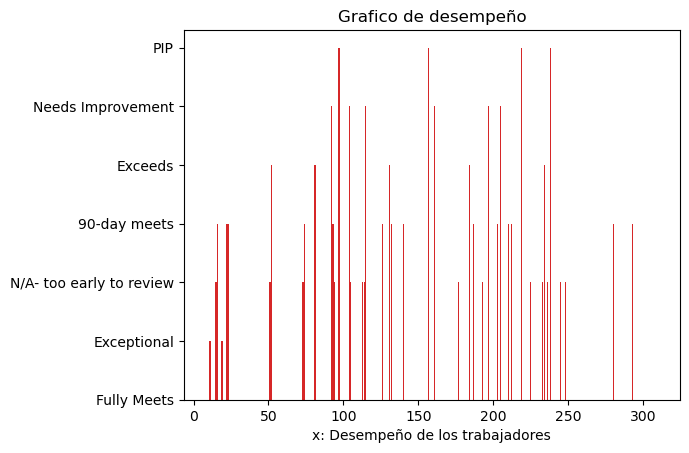

In [274]:
#cantidad media de habitaciones
x = df5["DesempeÃ±o"]
fig, ax = plt.subplots()
ax.bar( x.index, x , color = "tab:red")
#Titulos
plt.title('Grafico de desempeño')
plt.xlabel('x: Desempeño de los trabajadores')
plt.show()

Estado  DesempeÃ±o              
0       90-day meets                 7
        Exceeds                      3
        Exceptional                  2
        Fully Meets                 33
        N/A- too early to review     4
        Needs Improvement            1
        PIP                          1
1       90-day meets                 7
        Exceeds                      2
        Fully Meets                 19
        N/A- too early to review    10
        Needs Improvement            5
        PIP                          3
Name: DesempeÃ±o, dtype: int64
Estado
0    51
1    46
Name: DesempeÃ±o, dtype: int64


Text(0, 0.5, 'y: Cantidad desempeño de los trabajadores')

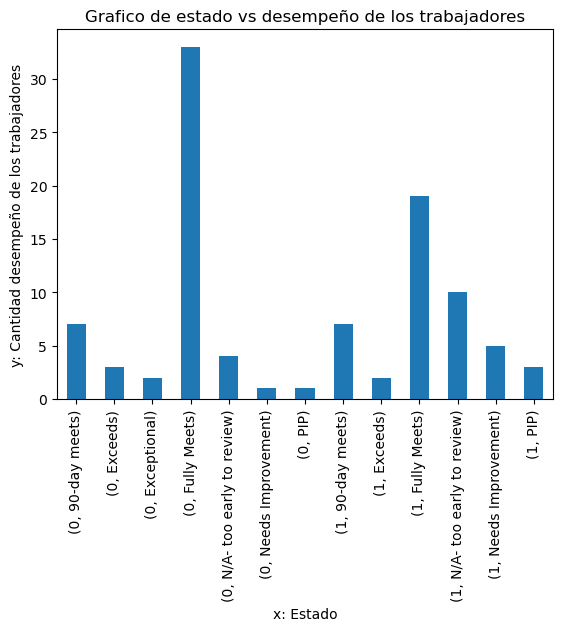

In [276]:
#Filtro solicitado solo con los sobrevivientes
df6 = df5.groupby(["Estado", 'DesempeÃ±o' ])['DesempeÃ±o'].count()
print(df6)
df7 = df5.groupby(["Estado"])['DesempeÃ±o'].count()
print(df7)
df6.plot(kind="bar");
plt.title('Grafico de estado vs desempeño de los trabajadores')
plt.xlabel('x: Estado')
plt.ylabel('y: Cantidad desempeño de los trabajadores')

Estado: Estado actual del trabajador en la empresa (1: desvinculado, 0: vinculado). 

Respecto a las variables categoricas relacionadas con el estado que pueden modelar la probabildiad de estar desvinculado de la empresa se tiene que, respecto al sexo de los trabajadores el sexo femenino es el que se ha desvinculado y viculado. Ahora de a cuerdo a la posicion, se destaca que los cargos mas anlizados fueron los de produccion, teniendo un mayo indice de rotacion, destacandose los tecnicos I y II, de manera significativa sobre los demas. Por ultimo respecto al desempeño, los vinculados habian satisfecho completamente las espectativas en su mayoria. 